In [3]:
import mlflow
import os
os.environ["MLFLOW_TRACKING_URI"] = ""
os.environ["DATABRICKS_HOST"] = ""
os.environ["DATABRICKS_TOKEN"] = ""
mlflow.set_registry_uri("databricks")
mlflow.sklearn.autolog(registered_model_name="Forecasting Wind Power")

In [4]:
import mlflow
import mlflow.sklearn
import pandas as pd
import matplotlib.pyplot as plt
 
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [5]:
cal_housing = fetch_california_housing()
 
# split 80/20 train-test
X_train, X_test, y_train, y_test = train_test_split(cal_housing.data,
                                                    cal_housing.target,
                                                    test_size=0.2)
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
mlflow.set_experiment("/Users/gteicom@hotmail.com/Forecasting Wind Power")
# With autolog() enabled, all model parameters, a model score, and the fitted model are automatically logged.  
with mlflow.start_run():
  
  # Set the model parameters. 
  n_estimators = 100
  max_depth = 6
  max_features = 3
  
  # Create and train model.
  rf = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, max_features = max_features)
  rf.fit(X_train, y_train)
  
  # Use the model to make predictions on the test dataset.
  predictions = rf.predict(X_test) 
  

2023/08/04 14:14:18 INFO mlflow.tracking.fluent: Experiment with name '/Users/gteicom@hotmail.com/Forecasting Wind Power' does not exist. Creating a new experiment.
Registered model 'Forecasting Wind Power' already exists. Creating a new version of this model...
2023/08/04 14:14:27 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: Forecasting Wind Power, version 2
Created version '2' of model 'Forecasting Wind Power'.


In [8]:
with mlflow.start_run():
  
  # Set the model parameters. 
  n_estimators = 100
  max_depth = 6
  max_features = 3
  
  # Create and train model.
  rf = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, max_features = max_features)
  rf.fit(X_train, y_train)
  
  # Use the model to make predictions on the test dataset.
  predictions = rf.predict(X_test) 


Registered model 'Forecasting Wind Power' already exists. Creating a new version of this model...
2023/08/04 14:14:47 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: Forecasting Wind Power, version 3
Created version '3' of model 'Forecasting Wind Power'.


In [9]:
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from hyperopt.pyll.base import scope
 
search_space = {
  'max_depth': scope.int(hp.quniform('max_depth', 2, 10, 1)),
  'n_estimators': scope.int(hp.quniform('n_estimators', 200, 1000, 100)),
  'max_features': scope.int(hp.quniform('max_features', 3, 8, 1)),
}
 
def train_model(params):
   
  # Create and train model.
  rf = RandomForestRegressor(random_state=0, **params)
  rf.fit(X_train, y_train)
  
  predictions = rf.predict(X_test)
  
  # Evaluate the model
  mse = mean_squared_error(y_test, predictions)
  
  return {"loss": mse, "status": STATUS_OK}
  
  
# spark_trials = SparkTrials()
trials = Trials()
with mlflow.start_run() as run:
  best_params = fmin(
    fn=train_model, 
    space=search_space, 
    algo=tpe.suggest, 
    max_evals=2,
    trials=trials)


  0%|          | 0/8 [00:00<?, ?trial/s, best loss=?]

Registered model 'Forecasting Wind Power' already exists. Creating a new version of this model...
2023/08/04 14:15:38 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: Forecasting Wind Power, version 4

Created version '4' of model 'Forecasting Wind Power'.


 12%|█▎        | 1/8 [00:52<06:07, 52.54s/trial, best loss: 0.28039111935587735]

Registered model 'Forecasting Wind Power' already exists. Creating a new version of this model...
2023/08/04 14:16:04 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: Forecasting Wind Power, version 5

Created version '5' of model 'Forecasting Wind Power'.
2023/08/04 14:16:11 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: The following failures occurred while performing one or more logging operations: [MlflowException("Failed to perform one or more operations on the run with ID 329e1fa27a574788a755d97b7f1cb4d0. Failed operations: [RestException('INVALID_PARAMETER_VALUE: Parameter with key max_depth was already logged with a value of 10. The attempted new value was 6')]")]



 25%|██▌       | 2/8 [01:13<03:24, 34.15s/trial, best loss: 0.28039111935587735]

Registered model 'Forecasting Wind Power' already exists. Creating a new version of this model...
2023/08/04 14:16:32 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: Forecasting Wind Power, version 6

Created version '6' of model 'Forecasting Wind Power'.
2023/08/04 14:16:39 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: The following failures occurred while performing one or more logging operations: [MlflowException("Failed to perform one or more operations on the run with ID 329e1fa27a574788a755d97b7f1cb4d0. Failed operations: [RestException('INVALID_PARAMETER_VALUE: Parameter with key max_depth was already logged with a value of 10. The attempted new value was 3')]")]



 38%|███▊      | 3/8 [01:42<02:38, 31.63s/trial, best loss: 0.28039111935587735]

Registered model 'Forecasting Wind Power' already exists. Creating a new version of this model...
2023/08/04 14:16:53 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: Forecasting Wind Power, version 7

Created version '7' of model 'Forecasting Wind Power'.
2023/08/04 14:16:59 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: The following failures occurred while performing one or more logging operations: [MlflowException("Failed to perform one or more operations on the run with ID 329e1fa27a574788a755d97b7f1cb4d0. Failed operations: [RestException('INVALID_PARAMETER_VALUE: Parameter with key max_depth was already logged with a value of 10. The attempted new value was 4')]")]



 50%|█████     | 4/8 [02:02<01:48, 27.07s/trial, best loss: 0.28039111935587735]

Registered model 'Forecasting Wind Power' already exists. Creating a new version of this model...
2023/08/04 14:17:30 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: Forecasting Wind Power, version 8

Created version '8' of model 'Forecasting Wind Power'.
2023/08/04 14:17:40 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: The following failures occurred while performing one or more logging operations: [MlflowException("Failed to perform one or more operations on the run with ID 329e1fa27a574788a755d97b7f1cb4d0. Failed operations: [RestException('INVALID_PARAMETER_VALUE: Parameter with key max_depth was already logged with a value of 10. The attempted new value was 7')]")]



 62%|██████▎   | 5/8 [02:43<01:35, 31.96s/trial, best loss: 0.28039111935587735]

Registered model 'Forecasting Wind Power' already exists. Creating a new version of this model...
2023/08/04 14:18:23 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: Forecasting Wind Power, version 9

Created version '9' of model 'Forecasting Wind Power'.
2023/08/04 14:18:34 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: The following failures occurred while performing one or more logging operations: [MlflowException("Failed to perform one or more operations on the run with ID 329e1fa27a574788a755d97b7f1cb4d0. Failed operations: [RestException('INVALID_PARAMETER_VALUE: Parameter with key max_depth was already logged with a value of 10. The attempted new value was 7')]")]



 75%|███████▌  | 6/8 [03:36<01:18, 39.38s/trial, best loss: 0.28039111935587735]

Registered model 'Forecasting Wind Power' already exists. Creating a new version of this model...
2023/08/04 14:19:12 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: Forecasting Wind Power, version 10

Created version '10' of model 'Forecasting Wind Power'.
2023/08/04 14:19:19 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: The following failures occurred while performing one or more logging operations: [MlflowException("Failed to perform one or more operations on the run with ID 329e1fa27a574788a755d97b7f1cb4d0. Failed operations: [RestException('INVALID_PARAMETER_VALUE: Parameter with key max_depth was already logged with a value of 10. The attempted new value was 6')]")]



 88%|████████▊ | 7/8 [04:21<00:41, 41.19s/trial, best loss: 0.28039111935587735]

Registered model 'Forecasting Wind Power' already exists. Creating a new version of this model...
2023/08/04 14:19:39 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: Forecasting Wind Power, version 11

Created version '11' of model 'Forecasting Wind Power'.
2023/08/04 14:19:46 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: The following failures occurred while performing one or more logging operations: [MlflowException("Failed to perform one or more operations on the run with ID 329e1fa27a574788a755d97b7f1cb4d0. Failed operations: [RestException('INVALID_PARAMETER_VALUE: Parameter with key max_depth was already logged with a value of 10. The attempted new value was 4')]")]



100%|██████████| 8/8 [04:48<00:00, 36.12s/trial, best loss: 0.28039111935587735]


In [10]:
feature_importances = pd.DataFrame(rf.feature_importances_, index=cal_housing.feature_names, columns=['importance'])
feature_importances.sort_values('importance', ascending=False)

import hyperopt
 
print(hyperopt.space_eval(search_space, best_params))
max_depth = int(hyperopt.space_eval(search_space, best_params)["max_depth"])
max_features = int(hyperopt.space_eval(search_space, best_params)["max_features"])
n_estimators = int(hyperopt.space_eval(search_space, best_params)["n_estimators"]) 
X_all_train = scaler.fit_transform(cal_housing.data)
y_all_train = cal_housing.target


{'max_depth': 10, 'max_features': 4, 'n_estimators': 800}


Registered model 'Forecasting Wind Power' already exists. Creating a new version of this model...
2023/08/04 14:20:40 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: Forecasting Wind Power, version 12
Created version '12' of model 'Forecasting Wind Power'.


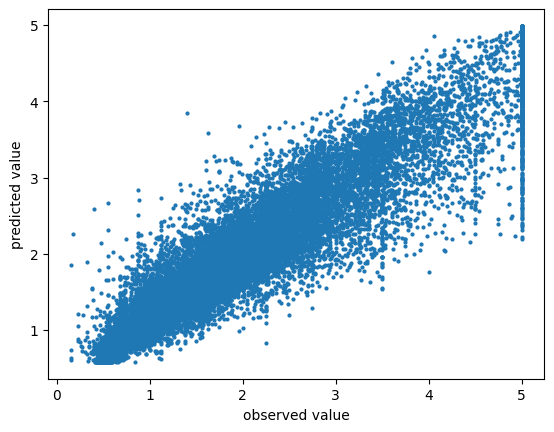

In [11]:
with mlflow.start_run() as run:
  
  rf_new = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, max_features = max_features)
  rf_new.fit(X_all_train, y_all_train)
  
  # Save the run information to register the model later
  rf_uri = run.info.artifact_uri
  
  # Plot predicted vs known values for a quick visual check of the model and log the plot as an artifact
  rf_pred = rf_new.predict(X_all_train)
  plt.plot(y_all_train, rf_pred, "o", markersize=2)
  plt.xlabel("observed value")
  plt.ylabel("predicted value")
  plt.savefig("rfplot.png")
  mlflow.log_artifact("rfplot.png") 


In [12]:
import time
 
model_name = "Forecasting Wind Power"
model_uri = rf_uri+"/model"
new_model_version = mlflow.register_model(model_uri, model_name)
 
# Registering the model takes a few seconds, so add a delay before continuing with the next cell
time.sleep(5)


Registered model 'Forecasting Wind Power' already exists. Creating a new version of this model...
2023/08/04 14:21:18 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: Forecasting Wind Power, version 13
Created version '13' of model 'Forecasting Wind Power'.


In [13]:
new_data = [[ 2.2 , -0.9,  1.05, -0.08, -0.34, 0.01,  0.74, -1.1],
            [ -0.9 , 2.6,  -1.4, -0.54, -0.86, 0.77,  0.35, -.08] ]
 
rf_model = mlflow.sklearn.load_model(f"models:/{model_name}/{new_model_version.version}")
preds = rf_model.predict(new_data)
preds


array([4.04110065, 1.02454188])